# Netflix Movies analysis project

## Target of project
- Practice using libraries like pandas, matplotlib
- Practice explaining targeted problems
- Practice visualization

## Data
Data I used comes from a website called "Kaggle" which is a data science community with resources
The file i used can be found at link: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows

## Data description:
- show_id: A unique identifier for each title.
- type: The category of the title, which is either 'Movie' or 'TV Show'.
- title: The name of the movie or TV show.
- director: The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)
cast: The list of main actors/actresses in the title. (Some entries might not have this information.)
- country: The country or countries where the movie or TV show was produced.
- date_added: The date the title was added to Netflix.
- release_year: The year the movie or TV show was originally released.
- rating: The age rating of the title.
- duration: The duration of the title, in minutes for movies and seasons for TV shows.
- listed_in: The genres the title falls under.
- description: A brief summary of the title.


### Importing libraries

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

### Loading data

In [174]:
netflix_movies = pd.read_csv('data/netflix_titles.csv', delimiter=',', decimal='.', index_col=0, encoding='latin1',  dtype={'listed_in': 'object', 'country': 'object'})

### Data exploration

In [175]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, s1 to s8809
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8809 non-null   object 
 1   title         8809 non-null   object 
 2   director      6175 non-null   object 
 3   cast          7984 non-null   object 
 4   country       7978 non-null   object 
 5   date_added    8799 non-null   object 
 6   release_year  8809 non-null   int64  
 7   rating        8805 non-null   object 
 8   duration      8806 non-null   object 
 9   listed_in     8809 non-null   object 
 10  description   8809 non-null   object 
 11  Unnamed: 12   0 non-null      float64
 12  Unnamed: 13   0 non-null      float64
 13  Unnamed: 14   0 non-null      float64
 14  Unnamed: 15   0 non-null      float64
 15  Unnamed: 16   0 non-null      float64
 16  Unnamed: 17   0 non-null      float64
 17  Unnamed: 18   0 non-null      float64
 18  Unnamed: 19   0 non-null      f

In [176]:
netflix_movies.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
null_counts = netflix_movies.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


In [178]:
num_rows = len(netflix_movies)
num_rows

8809

### Data cleaning

#### Deleting unnamed columns

In [179]:
# drop unnamed columns
netflix_movies.drop(netflix_movies.columns[netflix_movies.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [180]:
# null counts
null_counts = netflix_movies.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


#### Converting data types for easier access

In [181]:
text_columns = netflix_movies.select_dtypes(include=['object']).columns

In [182]:
text_columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [183]:
# Director null values handling
# Replace null values with 'No data' for easier readability
netflix_movies["director"] = netflix_movies["director"].fillna('No data')
netflix_movies["director"] = netflix_movies["director"].str.split(",")
netflix_movies["director"] = netflix_movies["director"].apply(lambda x: [item.strip() for item in x if item.strip() != ''])

print(netflix_movies['director'])

show_id
s1       [Kirsten Johnson]
s2               [No data]
s3       [Julien Leclercq]
s4               [No data]
s5               [No data]
               ...        
s8805    [Ruben Fleischer]
s8806       [Peter Hewitt]
s8807        [Mozez Singh]
s8808       [Yeon Sang-ho]
s8809       [Susanne Bier]
Name: director, Length: 8809, dtype: object


In [184]:
# Cast null values handling
# Replace null values with 'No data' for easier readability
netflix_movies["cast"] = netflix_movies["cast"].fillna('No data')
netflix_movies["cast"] = netflix_movies["cast"].str.split(",")
netflix_movies["cast"] = netflix_movies["cast"].apply(lambda x: [item.strip() for item in x if item.strip() != ''])

print(netflix_movies['cast'])

show_id
s1                                               [No data]
s2       [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...
s3       [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...
s4                                               [No data]
s5       [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...
                               ...                        
s8805    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...
s8806    [Tim Allen, Courteney Cox, Chevy Chase, Kate M...
s8807    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...
s8808         [Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan]
s8809    [Bradley Cooper, Jennifer Lawrence, Toby Jones...
Name: cast, Length: 8809, dtype: object


In [185]:
# Replace null values with 'No data' for easier readability
netflix_movies["country"] = netflix_movies["country"].fillna('No data')
netflix_movies["country"] = netflix_movies["country"].str.split(",")
netflix_movies["country"] = netflix_movies["country"].apply(lambda x: [item.strip() for item in x if item.strip() != ''])

print(netflix_movies['country'])

show_id
s1       [United States]
s2        [South Africa]
s3             [No data]
s4             [No data]
s5               [India]
              ...       
s8805    [United States]
s8806    [United States]
s8807            [India]
s8808      [South Korea]
s8809    [United States]
Name: country, Length: 8809, dtype: object


In [186]:
no_data_count = netflix_movies["country"].explode().str.contains('No data').sum()
print(f"The number of 'No data' values in the 'country' column is: {no_data_count}")

The number of 'No data' values in the 'country' column is: 831


In [187]:
# Convert dates to datetime type
netflix_movies['date_added'] = netflix_movies['date_added'].str.strip()
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'], errors='coerce')
print(netflix_movies['date_added'])

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
s8808   2024-04-05
s8809   2024-04-05
Name: date_added, Length: 8809, dtype: datetime64[ns]


In [188]:
# remove rows where date_added is null
netflix_movies = netflix_movies[~netflix_movies['date_added'].isna()]

In [189]:
print(f"The number of null values in the 'date_added' column is: {netflix_movies['date_added'].isnull().sum()}")

The number of null values in the 'date_added' column is: 0


In [190]:
# Splitting column 'listed_in' as there can be multiple values in column
netflix_movies["listed_in"] = netflix_movies["listed_in"].str.split(",")
netflix_movies["listed_in"] = netflix_movies["listed_in"].apply(lambda x: [item.strip() for item in x])

print(netflix_movies['listed_in'])

show_id
s1                                         [Documentaries]
s2       [International TV Shows, TV Dramas, TV Mysteries]
s3       [Crime TV Shows, International TV Shows, TV Ac...
s4                                [Docuseries, Reality TV]
s5       [International TV Shows, Romantic TV Shows, TV...
                               ...                        
s8805                            [Comedies, Horror Movies]
s8806                 [Children & Family Movies, Comedies]
s8807     [Dramas, International Movies, Music & Musicals]
s8808                             [Sci-fi, Horror, Action]
s8809                           [Drama, Romance, Thriller]
Name: listed_in, Length: 8799, dtype: object


In [191]:
# Handling rating null values
netflix_movies['rating'] = netflix_movies['rating'].fillna('No data')
print(netflix_movies['rating'])

show_id
s1       PG-13
s2       TV-MA
s3       TV-MA
s4       TV-MA
s5       TV-MA
         ...  
s8805        R
s8806       PG
s8807    TV-14
s8808    TV-MA
s8809        A
Name: rating, Length: 8799, dtype: object


In [192]:
# Handling duration null values
netflix_movies['duration'] = netflix_movies['duration'].fillna('No data')
print(netflix_movies['duration'])

show_id
s1          90 min
s2       2 Seasons
s3        1 Season
s4        1 Season
s5       2 Seasons
           ...    
s8805       88 min
s8806       88 min
s8807      111 min
s8808     1 Season
s8809      110 min
Name: duration, Length: 8799, dtype: object


### Dataset after cleaning

In [193]:
netflix_movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[No data],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,[No data],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[No data],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,[No data],[No data],[No data],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,[No data],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


In [194]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8799 entries, s1 to s8809
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8799 non-null   object        
 1   title         8799 non-null   object        
 2   director      8799 non-null   object        
 3   cast          8799 non-null   object        
 4   country       8799 non-null   object        
 5   date_added    8799 non-null   datetime64[ns]
 6   release_year  8799 non-null   int64         
 7   rating        8799 non-null   object        
 8   duration      8799 non-null   object        
 9   listed_in     8799 non-null   object        
 10  description   8799 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.9+ KB


In [195]:
null_counts = netflix_movies.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## Analysis

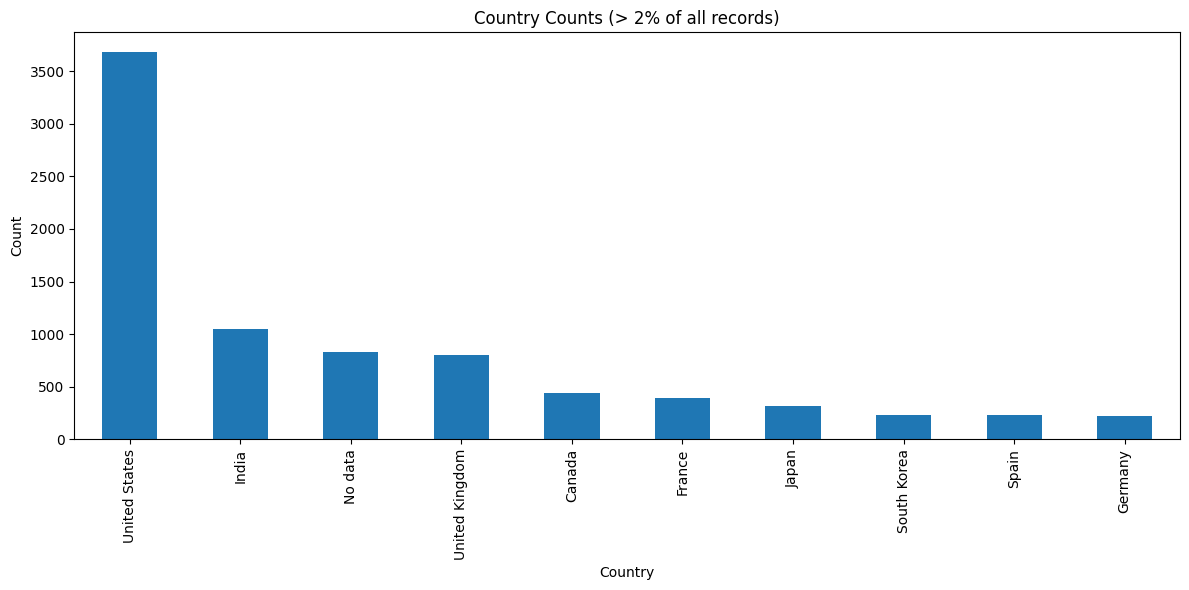

In [196]:
# Count the number of occurrences for each country
country_counts = netflix_movies['country'].explode().value_counts()

# Calculate the total number of records
total_records = netflix_movies.shape[0]

# Filter the countries with more than 2% of all records
top_countries = country_counts[country_counts / total_records > 0.02].index

# Create a bar chart for the top countries
plt.figure(figsize=(12, 6))
country_counts[top_countries].plot(kind='bar')
plt.title('Country Counts (> 2% of all records)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

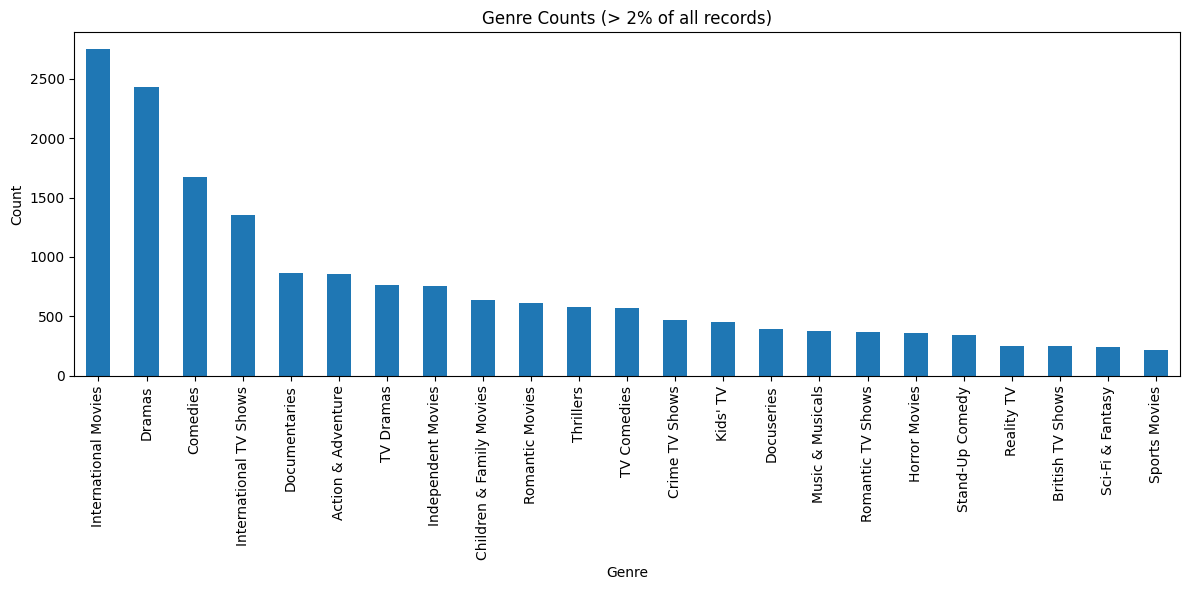

In [197]:
# Count the number of occurrences for each genre
genre_counts = netflix_movies['listed_in'].explode().value_counts()

# Calculate the total number of records
total_records = netflix_movies.shape[0]

# Filter the genres with more than 2% of all records
top_genres = genre_counts[genre_counts / total_records > 0.02].index

# Create a bar chart for the top genres
plt.figure(figsize=(12, 6))
genre_counts[top_genres].plot(kind='bar')
plt.title('Genre Counts (> 2% of all records)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

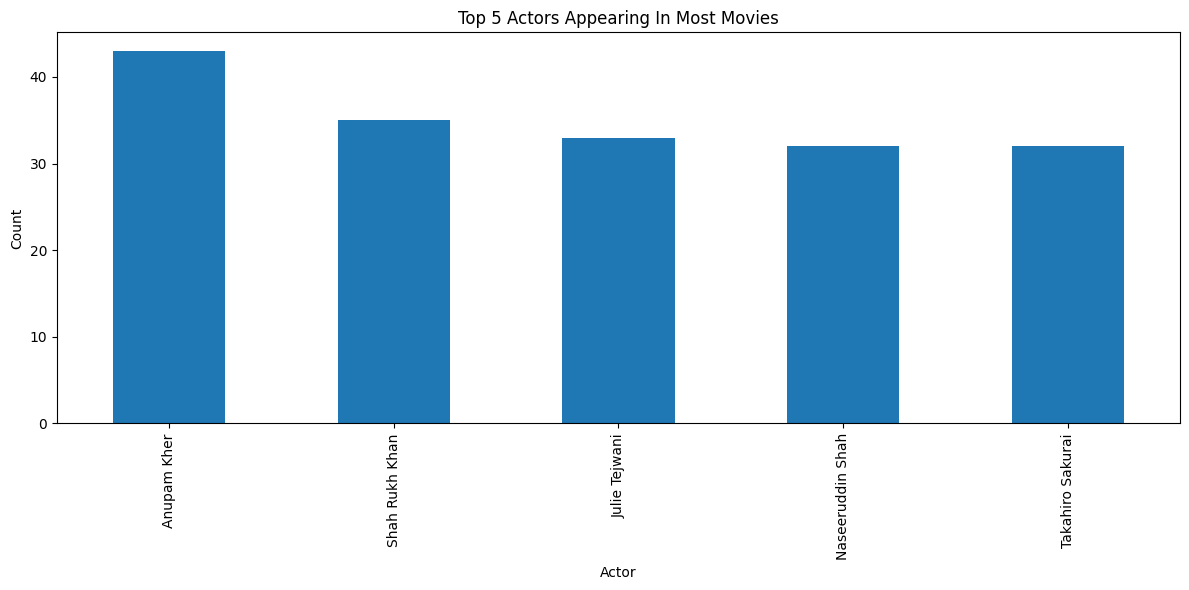

In [198]:
# Count the number of occurrences for each genre
actor_counts = netflix_movies['cast'].explode().value_counts()
actor_counts = actor_counts[actor_counts.index != 'No data']

top_actors = actor_counts.head(5)

# Create a bar plot for the top 5 actors
top_actors.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 Actors Appearing In Most Movies')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

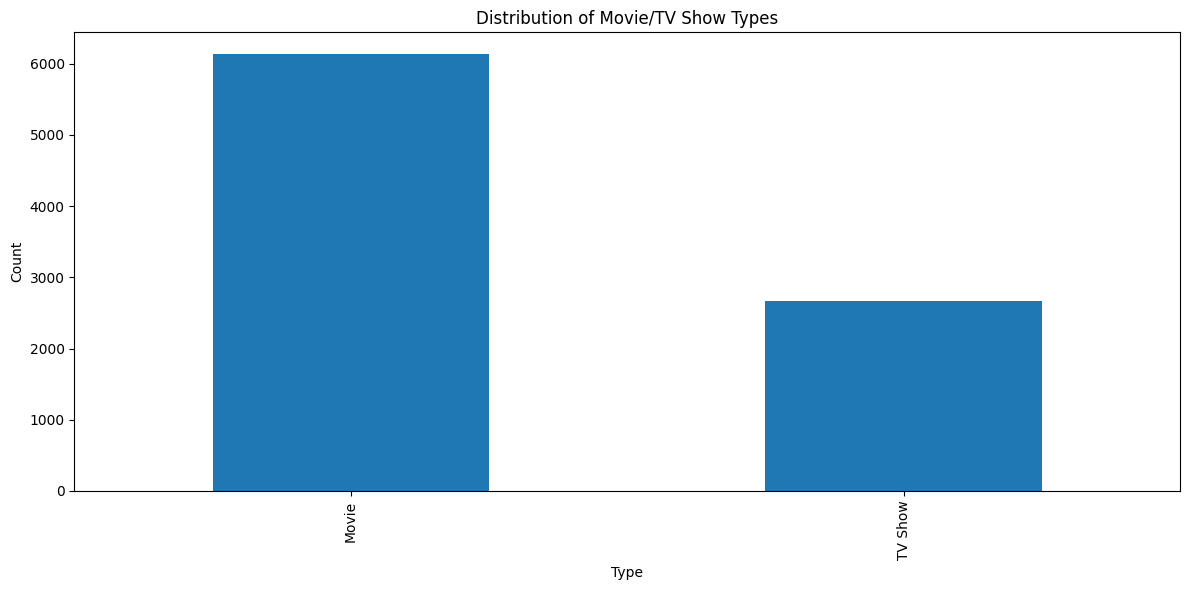

In [199]:
# Count the occurrences of each 'type' value
type_counts = netflix_movies['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Distribution of Movie/TV Show Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

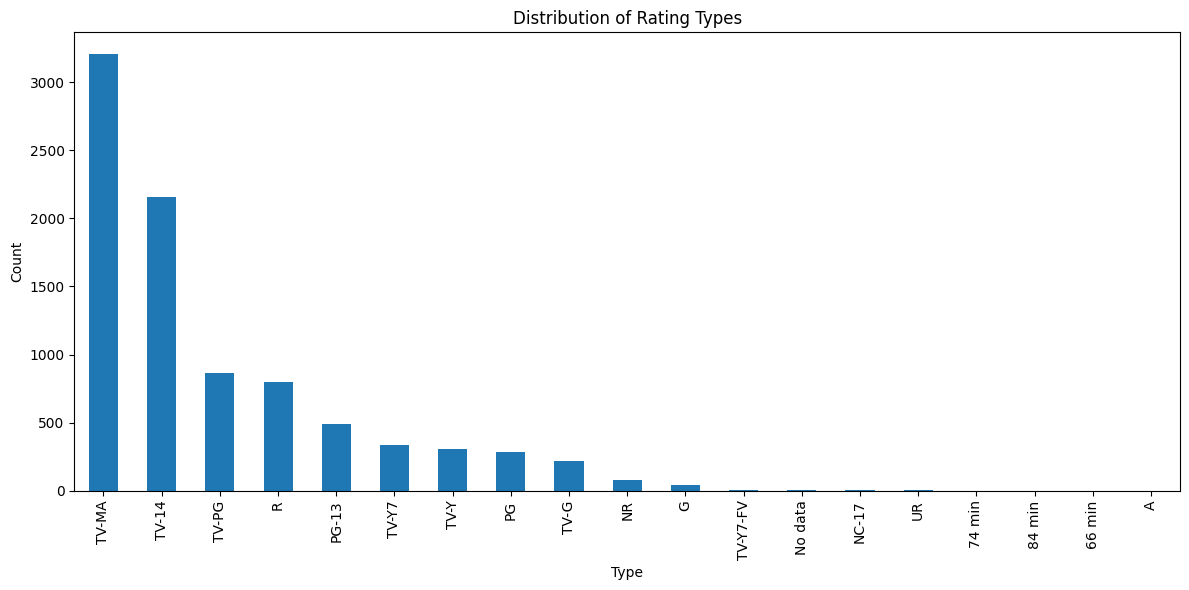

In [200]:
# Count the occurrences of each 'type' value
rating_counts = netflix_movies['rating'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Rating Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()